<a href="https://colab.research.google.com/github/EduardoMoraesRitter/Introducao-NLP-analise-sentimento/blob/master/classificar_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##classificar os texto

1.   ler uma base categorizada do IMDB no kaggle em portugues. https://www.kaggle.com/luisfredgs/imdb-ptbr

2.   Entender os dados depois verificar as classes se estao balanciadas

1.   Prepara e limpar os dados

2.   NLP - transforma texto em numeros:
  *   corpos textual todas as resenhas - criar um vocabulario(dicionario) 
  *   criando assim um vetro de palavras, sacola de palagras(bag of words "BOW"), cuidado com o numero de dimencoes.

1.   Separa base de teste e treino, com train_test_split

2.   Criar uma modelo de Regressao Logisitca e ver o score https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

1.   classificar os texto
2.   visualizar com word clouds
1.   pareto que nos auxiliará na análise desses dados
2.   TOKENIZACAO com NLTK


selecionar todos os comentários e vetorizá-los. Depois é necessário dividir os dados em treino e teste para então determinar um método de classificação que trabalhe bem com dados esparsos. Por fim, deve-se treinar o classificador escolhido, realizar a previsão e medir os dados de teste.



outro exemplo com LSTM

https://medium.com/luisfredgs/an%C3%A1lise-de-sentimentos-com-redes-neurais-recorrentes-lstm-a5352b21e6aa

In [0]:
import pandas as pd

In [2]:
resenha = pd.read_csv('https://raw.githubusercontent.com/EduardoMoraesRitter/Introducao-NLP-analise-sentimento/master/IMDB_KAGGLE.CSV', delimiter=";", encoding='latin1')
resenha

,id,text_pt,sentiment
0,1,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...
49454,49456,"Como a média de votos era muito baixa, e o fat...",pos
49455,49457,O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together realmente veio antes do m...,pos


In [3]:
print(resenha.text_pt[189])

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [4]:
#quantidade de classes para cada um sao proximas
resenha.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [5]:
#preparar os dados
classificacao = resenha['sentiment'].replace(["neg", "pos"], [0,1])
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [6]:
resenha['classificacao'] = classificacao
resenha

,id,text_pt,sentiment,classificacao
0,1,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...
49454,49456,"Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together realmente veio antes do m...,pos,1


NLP

In [0]:
#bag of words - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
#criar um verto
vetorizar = CountVectorizer(lowercase=False)
bag_word = vetorizar.fit_transform(resenha.text_pt)

In [10]:
#print(vetorizar.get_feature_names())
#print(bag_word)
print(bag_word.shape) #156.915 dimencoes
#bag_word

(49459, 156915)


In [11]:
#criar um vetor com as palavras mais relevantes passando o maximo de feture
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_word = vetorizar.fit_transform(resenha.text_pt)
print(bag_word.shape)

(49459, 50)


In [12]:
#pd.DataFrame nao roda tabela esparça
#oq é uma matriz esparça? 
#possui valores zeros, para nao gastar espaço de memoria em zero ele armazena dados com zero
matriz_esparca = pd.DataFrame.sparse.from_spmatrix(bag_word, columns=vetorizar.get_feature_names())
matriz_esparca

,Eu,ao,apenas,as,com,como,da,de,do,dos,ela,ele,eles,em,era,esse,este,está,eu,filme,filmes,foi,história,isso,mais,mas,me,muito,na,no,não,os,ou,para,por,quando,que,realmente,se,ser,seu,sobre,sua,são,também,tem,tão,um,uma,você
0,0,1,0,0,2,1,0,4,4,2,0,1,0,0,1,0,0,0,3,1,0,0,0,0,2,0,2,4,0,3,4,1,1,1,2,2,7,0,0,1,1,1,0,0,0,1,0,3,2,0
1,0,0,0,0,2,0,0,7,1,2,0,1,0,3,1,2,2,0,2,4,3,1,0,1,0,2,1,0,1,1,2,3,3,2,1,0,10,1,2,0,1,0,0,2,0,1,0,4,2,1
2,1,0,0,0,3,1,0,10,2,0,0,0,2,1,0,0,0,2,1,3,0,0,0,0,1,1,0,0,0,3,4,1,0,1,2,1,8,0,1,0,0,0,0,3,1,0,1,3,2,2
3,2,0,1,4,7,2,1,13,3,1,0,1,2,6,1,1,2,0,8,4,2,1,0,1,1,2,1,1,1,1,5,3,0,4,1,2,7,0,3,0,0,0,0,1,0,1,0,7,4,1
4,0,0,1,2,3,0,1,16,2,1,1,0,2,2,0,0,1,0,0,1,0,0,1,1,1,1,0,1,2,0,2,1,1,5,0,0,4,2,1,1,0,0,0,4,0,0,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0,2,0,0,0,1,1,5,1,0,0,0,0,2,1,1,0,0,3,3,1,1,0,1,0,1,0,4,0,1,1,0,1,0,0,0,2,0,0,0,0,0,1,0,0,0,0,2,1,0
49455,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,1,0
49456,1,0,0,1,3,8,1,14,8,4,0,3,0,5,2,2,3,2,1,8,5,1,0,1,3,1,2,3,3,2,5,3,0,4,5,1,13,0,0,1,1,0,1,4,0,1,1,12,3,2
49457,1,0,0,2,2,1,1,5,1,2,0,1,0,2,1,0,1,0,4,0,0,0,0,1,1,3,0,1,0,1,2,3,0,2,1,0,6,2,0,0,0,0,0,0,3,0,0,4,1,2


Classificaçao logistica

In [0]:
#separa as abase de treino e teste
from sklearn.model_selection import train_test_split

treino, teste, classes_treino, classes_teste = train_test_split(bag_word, 
                                                                resenha.classificacao,
                                                                random_state = 42)

In [17]:
treino

<37094x50 sparse matrix of type '<class 'numpy.int64'>'
	with 980651 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.linear_model import LogisticRegression

regressa_logistica = LogisticRegression()
regressa_logistica.fit(treino, classes_treino)
regressa_logistica.score(teste, classes_teste)

0.6583097452486858

encontrar os melhores palavras

In [21]:
def classificacao_texto(texto, coluna_texto, coluna_classificacao):

  vetorizar = CountVectorizer(lowercase=False, max_features=100)
  bag_word = vetorizar.fit_transform(texto[coluna_texto])

  treino, teste, classes_treino, classes_teste = train_test_split(bag_word, 
                                                                texto[coluna_classificacao],
                                                                random_state = 42)
  
  regressa_logistica = LogisticRegression()
  regressa_logistica.fit(treino, classes_treino)
  return regressa_logistica.score(teste, classes_teste)

print(classificacao_texto(resenha,'text_pt', 'classificacao'))
  

0.7014961585119288


WordCloud - descata palavras com maior frequancia

In [0]:
#gera o grafico na lina
%matplotlib inline

from wordcloud import WordCloud

In [28]:
# compreensão de lista - https://www.alura.com.br/artigos/simplicando-o-processamento-com-compreensao-de-lista-do-python
todas_palavras = ' '.join([texto for texto in resenha.text_pt])

#todas_palavras[:3]
print('quantidade de palavras: ',len(todas_palavras))

quantidade de palavras:  63448424


In [31]:
#contruir as palavra
nuvem_palavra = WordCloud().generate(todas_palavras)
nuvem_palavra

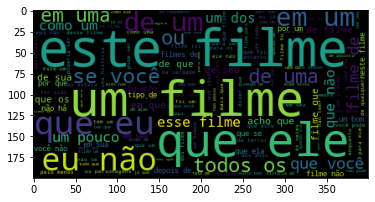

In [33]:
#tranformar o objeto em visual
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavra)
plt.show()